In [1]:
#| echo: fenced
# japanize_matplotlibとpolarsのインストール
!pip install -qq japanize_matplotlib 
!pip install -qq polars pyarrow

In [2]:
# 利用するライブラリを読み込む
# as で別名をつけることができる（長いライブラリ名の省略）
import japanize_matplotlib  # matplotlibの日本語化
import matplotlib.pyplot as plt  # データ可視化
import numpy as np  # 数値計算用
import pandas as pd  # 表形式データの操作
import polars as pl  # pandas と同じく表形式データの操作

データフレームの操作には`polars`と`pandas`の2つのライブラリを使用すると便利です。


In [3]:
# データ（csvファイル）の読み込み
# ファイルがある場所（パス）を指定する
# ウェブ上のデータを読み込む場合はURLを指定する
df = pl.read_csv(
    "https://raw.githubusercontent.com/uribo/cue2022aw_r104/main/data-raw/shikoku_kome_sisyutu2019to2021/20221121T014749Z-f75ff/shikoku_kome_sisyutu2019to2021.csv"
)

In [4]:
# 読み込んだデータの確認
# shape: データの行数と列数を確認する
df.shape

(864, 6)

In [5]:
# 型の確認
df.dtypes

[Int64, Utf8, Int64, Utf8, Utf8, Int64]

### データの可視化

コードセルで`df`と入力して実行すると、データフレームの中身が表示されます。
一方、行数の多いデータを出力すると画面が埋まってしまうので、一部だけを確認したいこともあります。
その場合、headやtailを使います。これにより、データフレームの先頭行や末尾行を表示することができます。括弧内の値は表示する行数です。


In [6]:
# 先頭3行を表示する
df.head(3)

ym,品目分類,市区町村コード,市,項目,value
i64,str,i64,str,str,i64
201901,"""アイスクリーム・シャーベット…",36201,"""徳島市""","""支出金額_複数単位""",367
201901,"""アイスクリーム・シャーベット…",36201,"""徳島市""","""購入頻度_100世帯当たり""",123
201901,"""殺虫・防虫剤""",36201,"""徳島市""","""支出金額_複数単位""",7


In [7]:
# 末尾2行を表示する
df.tail(2)

ym,品目分類,市区町村コード,市,項目,value
i64,str,i64,str,str,i64
202112,"""米""",39201,"""高知市""","""支出金額_複数単位""",1557
202112,"""米""",39201,"""高知市""","""購入頻度_100世帯当たり""",73


続いて、簡単なグラフを作成してみましょう。`matplotlib`にはPythonでグラフを作成する際に便利な関数をまとめた`pyplot`というモジュールがあります。`pyplot`を`plt`という名前でインポートしておきます。


In [8]:
# import matplotlib.pyplot as plt # 最初のコードセルで実行済み

`plt`には、`plot`や`scatter`などの関数があります。`plot`は折れ線グラフを、`scatter`は散布図を作成します。今回は棒グラフを作成したいので`bar`が対応します。

これらの関数の引数には、グラフに描画するx軸の値とy軸の値（変数）を指定します。

matplotlibがサポートするグラフの種類や詳しい関数の利用方法は[公式ドキュメント](https://matplotlib.org/stable/plot_types/index)を参照してください。


<BarContainer object of 864 artists>

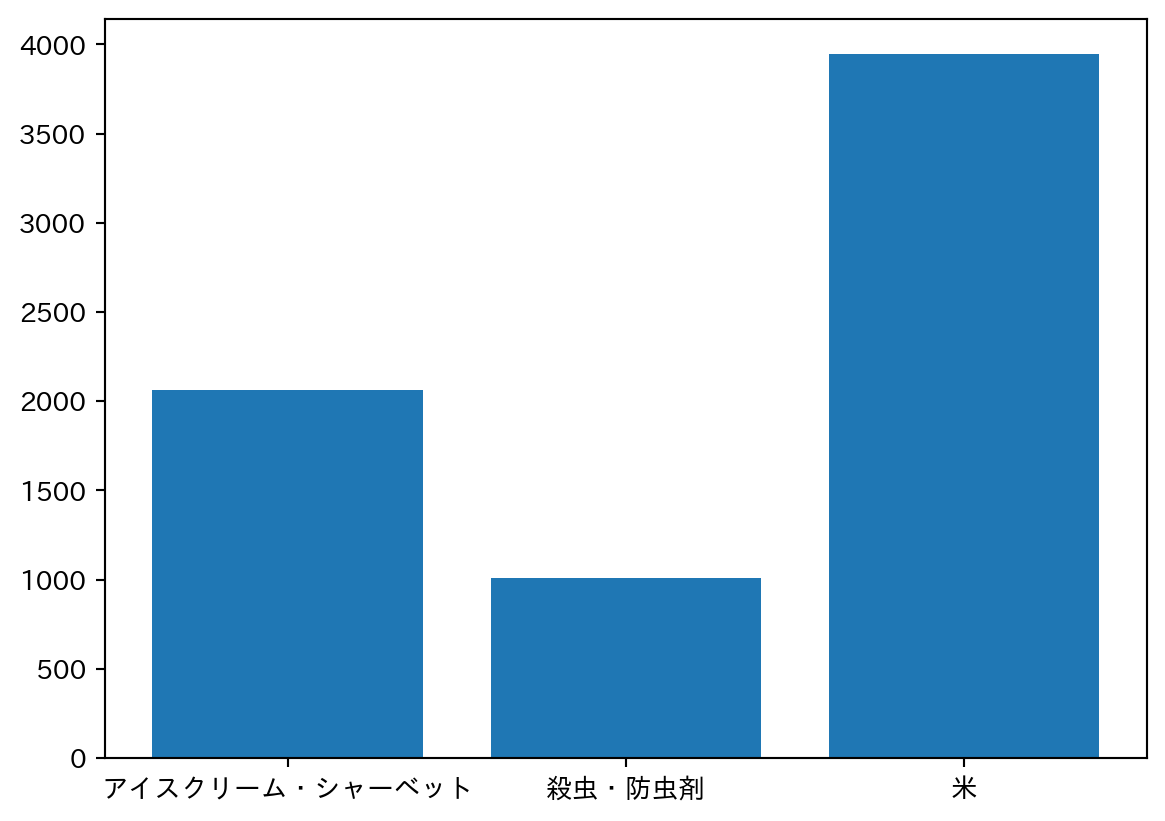

In [9]:
# 棒グラフを作成
# x軸には品目分類、y軸にはvalueを指定する
plt.bar(df["品目分類"], df["value"])
# plt.show() # グラフを表示する

別のグラフを作成してみましょう。

polarsライブラリのデータ操作関数を使い、一部のデータを抽出してグラフを作成してみます。


In [10]:
df2 = df.filter((pl.col("項目") == "支出金額_複数単位") & (pl.col("市区町村コード") == 36201))
df2 = df2.select("ym", "品目分類", "value")
df2.head(4)

ym,品目分類,value
i64,str,i64
201901,"""アイスクリーム・シャーベット…",367
201901,"""殺虫・防虫剤""",7
201901,"""米""",1138
201902,"""アイスクリーム・シャーベット…",244


上記のコードは以下のコードの実行結果と同じです。
polarsでは、`.`を使って処理内容をつなげて記述することができます。こうすることで変数への代入の手間がなくなるとともにコードを簡潔に記述できる利点があります。


In [11]:
df2 = df.filter((df["項目"] == "支出金額_複数単位") & (df["市区町村コード"] == 36201)).select(
    "ym", "品目分類", "value"
)
df2.head(4)

ym,品目分類,value
i64,str,i64
201901,"""アイスクリーム・シャーベット…",367
201901,"""殺虫・防虫剤""",7
201901,"""米""",1138
201902,"""アイスクリーム・シャーベット…",244


データの加工が済んだのでグラフを作成します。品目分類別に折れ線グラフを作成したいので、`groupby`関数を使います。`groupby`関数は、指定した列の値ごとにデータをグループ化します。今回は`item`列の値ごとにグループ化します。


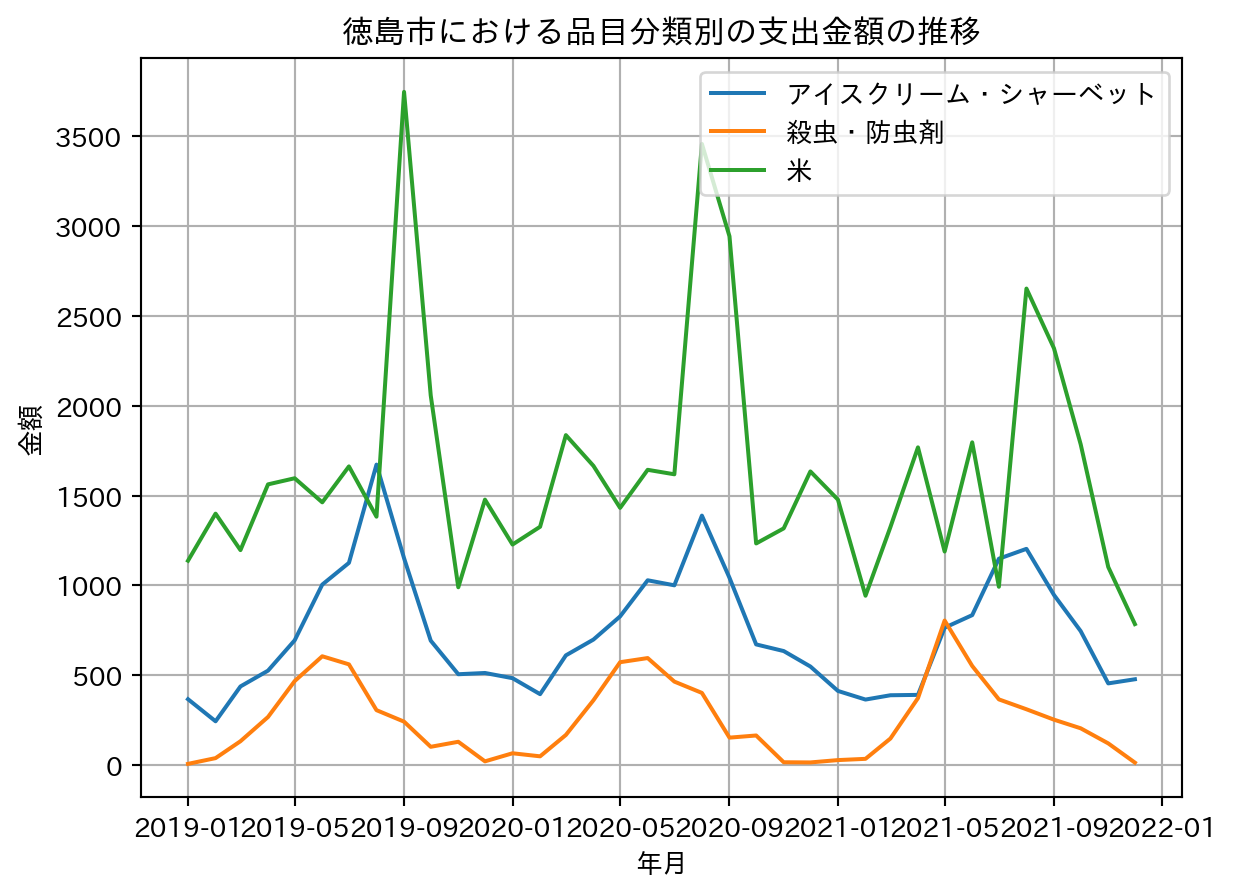

In [12]:
# pandasデータフレームに変換
df_pnd = df2.to_pandas()
# 年月の表現を変換 (i64クラスの年月をdatetime形式に変換)
df_pnd["ym"] = pd.to_datetime(df_pnd["ym"], format="%Y%m")

# 品目ごとにデータフレームをグループ化
grouped = df_pnd.groupby("品目分類")

# グループごとにプロット
for item, group in grouped:
    plt.plot(group["ym"], group["value"], label=item)

plt.xlabel("年月")
plt.ylabel("金額")
plt.title("徳島市における品目分類別の支出金額の推移")
plt.legend()
plt.grid(True)
plt.show()

#### 棒グラフの塗り分け


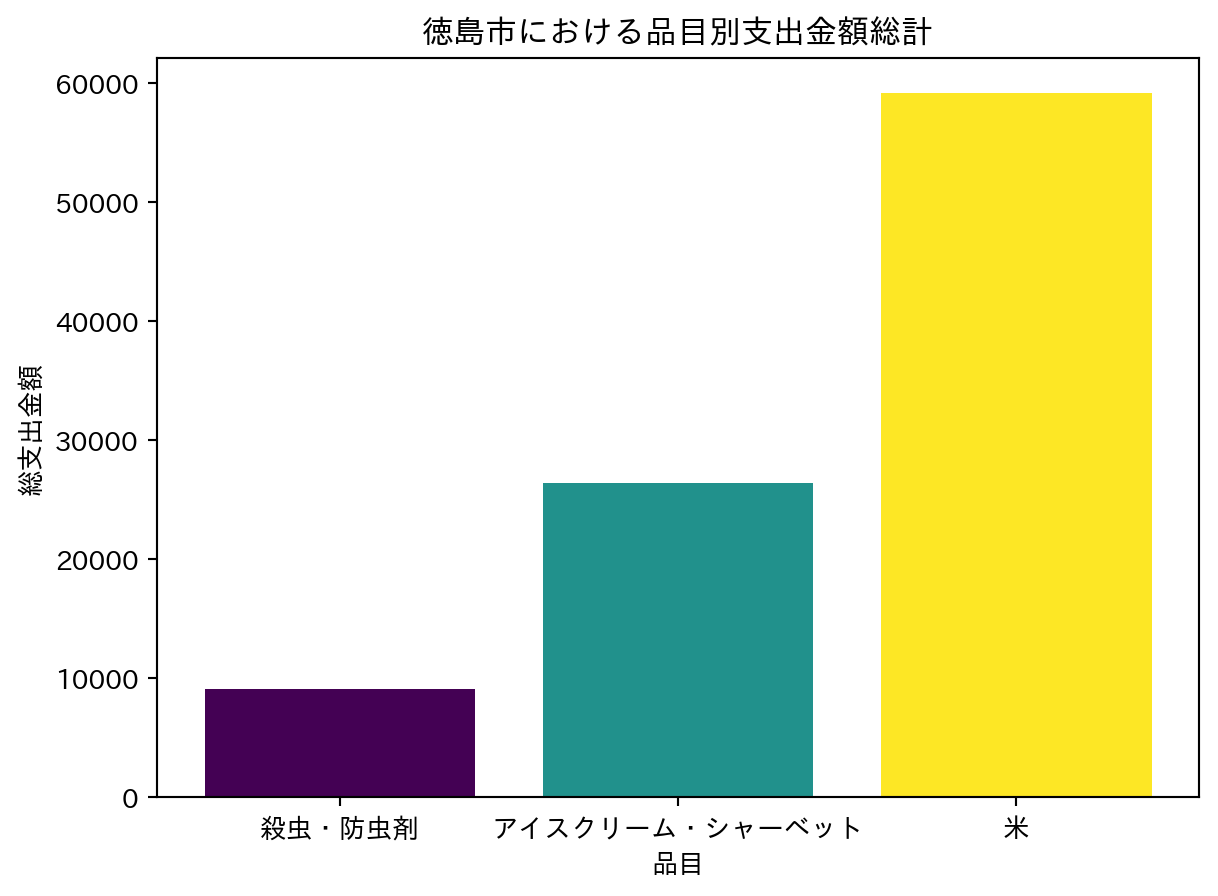

In [13]:
# グループごとに値を集計
grouped_df = df2.groupby("品目分類").agg(total_value=pl.col("value").sum())
# グループ名と集計された値を取得
groups, aggregated_values = grouped_df.get_columns()

# カラーマップを作成
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

# 棒グラフを描画し、グループごとに塗り分け
plt.bar(groups, aggregated_values, color=colors)

plt.xlabel("品目")
plt.ylabel("総支出金額")
plt.title("徳島市における品目別支出金額総計")
plt.show()

### インタラクティブに操作可能な図の作成

plotlyライブラリを使うとインタラクティブに操作できるグラフを作成できます。


In [14]:
import plotly.graph_objects as go

In [15]:
# 棒グラフを作成
fig = go.Figure(data=[go.Bar(x=groups, y=aggregated_values)])

In [16]:
# グラフのタイトルと軸ラベルを設定
fig.update_layout(
    title="徳島市における品目別支出金額総計",
    xaxis_title="品目",
    yaxis_title="総支出金額",
)

# グラフを表示
fig.show()